# Relatedness analysis
### PLINK pi_hat (share of IBD)

In [1]:
library(data.table)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
dat <- fread("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/plink.genome.gz",data.table=F)

In [3]:
head(dat)

,FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,849,849,11876,11876,UN,NA,0.7547,0,0.2453,0.2453,-1,0.870102,0e+00,1.7410
2,849,849,RNAID1969,RNAID1969,UN,NA,0.7777,0,0.2223,0.2223,-1,0.865977,0e+00,1.4741
3,898,898,1046,1046,UN,NA,0.8319,0,0.1681,0.1681,-1,0.857902,1e-04,1.7849
4,898,898,1092,1092,UN,NA,0.8377,0,0.1623,0.1623,-1,0.857149,7e-04,1.8203
5,898,898,1102,1102,UN,NA,0.8441,0,0.1559,0.1559,-1,0.856478,2e-03,1.8366
6,898,898,1107,1107,UN,NA,0.8435,0,0.1565,0.1565,-1,0.855699,0e+00,1.7353


In [5]:
dat %>% filter(FID2 == "HSB430", FID1 == "HSB289")

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
HSB289,HSB289,HSB430,HSB430,UN,NA,0.8439,0,0.1561,0.1561,-1,0.859352,0.6637,2.0257


In [4]:
dim(dat)

[1] 34492    14

In [17]:
p <- ggplot(dat, aes(x = seq_along(PI_HAT), y = PI_HAT)) +
    geom_point(size = .8) +
    labs(title = "Relatedness check", 
        subtitle = "Only showing pi_hat > 0.1",
        x = "Subject pairs",
        y = "Plink pi_hat") +
    geom_hline(yintercept = .3, linetype = 'dotted', col = 'red') +
    theme_classic() +
    theme(axis.text = element_text(size=10),
          axis.title = element_text(size=12),
          plot.title = element_text(size=16, face="bold", hjust = 0.5),
          plot.subtitle = element_text(size=14, hjust = 0.5))

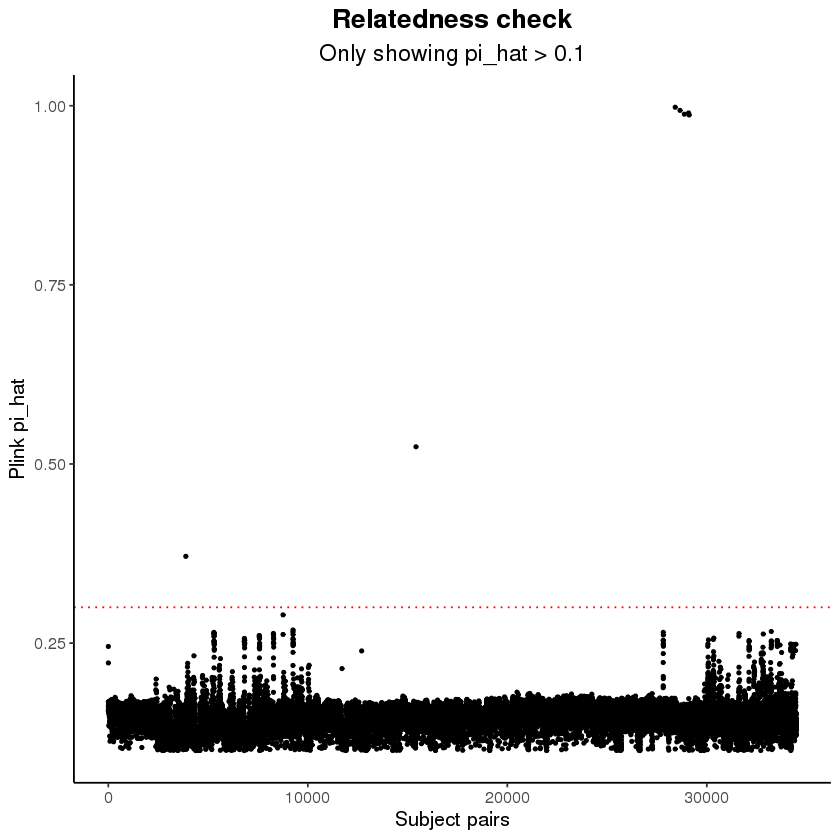

In [18]:
p

In [20]:
ggsave("~/project-gandalm/isoform_twas/genotype/figures/pihat.png", p, width = 6, height = 6)

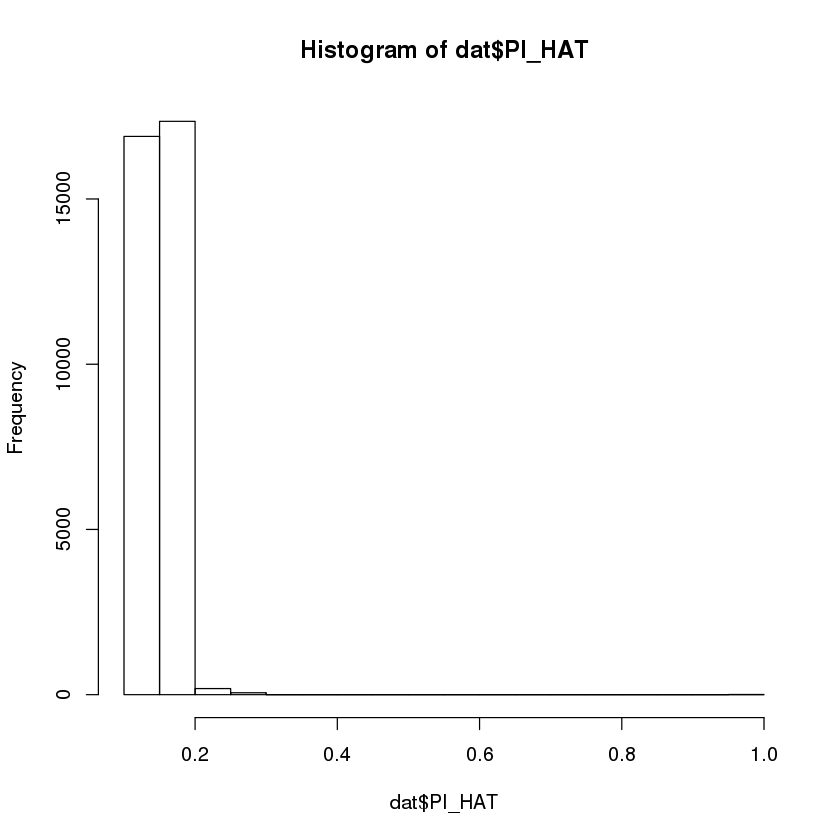

In [20]:
hist(dat$PI_HAT)

**Note these are exactly the same pairs of subjects in apex with kinship~.5 **

In [17]:
dat %>% filter(PI_HAT > 0.9)

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Br1779,Br1779,Br1794,Br1794,UN,NA,0.0001,0.0039,0.9959,0.9979,-1,0.999597,1,NA
Br2394,Br2394,HSB148,HSB148,UN,NA,0.0009,0.0112,0.9879,0.9935,-1,0.998765,1,1013.0000
Br2402,Br2402,HSB107,HSB107,UN,NA,0.0019,0.0197,0.9783,0.9882,-1,0.997777,1,390.5385
Br2411,Br2411,HSB154,HSB154,UN,NA,0.0014,0.0175,0.9811,0.9899,-1,0.998080,1,1297.5000
Br2412,Br2412,HSB100,HSB100,UN,NA,0.0010,0.0237,0.9752,0.9871,-1,0.997536,1,741.0000


In [22]:
rel <- dat %>% filter(PI_HAT > 0.3)
rel

FID1,IID1,FID2,IID2,RT,EZ,Z0,Z1,Z2,PI_HAT,PHE,DST,PPC,RATIO
<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1614,1614,1713,1713,UN,NA,0.3811,0.4957,0.1232,0.3711,-1,0.890180,1,7.1977
11602,11602,11841,11841,UN,NA,0.2940,0.3639,0.3421,0.5240,-1,0.917067,1,5.5668
Br1779,Br1779,Br1794,Br1794,UN,NA,0.0001,0.0039,0.9959,0.9979,-1,0.999597,1,NA
Br2394,Br2394,HSB148,HSB148,UN,NA,0.0009,0.0112,0.9879,0.9935,-1,0.998765,1,1013.0000
Br2402,Br2402,HSB107,HSB107,UN,NA,0.0019,0.0197,0.9783,0.9882,-1,0.997777,1,390.5385
Br2411,Br2411,HSB154,HSB154,UN,NA,0.0014,0.0175,0.9811,0.9899,-1,0.998080,1,1297.5000
Br2412,Br2412,HSB100,HSB100,UN,NA,0.0010,0.0237,0.9752,0.9871,-1,0.997536,1,741.0000


In [23]:
df <- data.frame(c(rel$IID1, rel$IID2))
df

c.rel.IID1..rel.IID2.
<fct>
1614
11602
Br1779
Br2394
Br2402
Br2411
Br2412
1713
11841


In [24]:
df$c.rel.IID1..rel.IID2. <- unique(df$c.rel.IID1..rel.IID2.)

In [25]:
df

c.rel.IID1..rel.IID2.
<fct>
1614
11602
Br1779
Br2394
Br2402
Br2411
Br2412
1713
11841


In [26]:
write.table(df, "~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/related.txt", col.names=F, row.names=F, quote=F, sep="\t")

In [28]:
nrow(df)

[1] 14

In [29]:
ancestry <- read.table("~/project-gandalm/isoform_twas/genotype/all_data/isec_R2_greater_than_3/ancestry/ancestry_list/ancestry.tsv", hea=T, stringsAsFactors = F)

In [30]:
head(ancestry)

,subject,ancestry
,<chr>,<chr>
1,898,eur
2,1038,eur
3,1046,eur
4,1092,eur
5,1102,eur
6,1107,eur


In [31]:
df <- df %>% left_join(ancestry, by=c("c.rel.IID1..rel.IID2."="subject"))
df

c.rel.IID1..rel.IID2.,ancestry
<chr>,<chr>
1614,afr
11602,amr
Br1779,afr
Br2394,eur
Br2402,eur
Br2411,afr
Br2412,afr
1713,afr
11841,amr


In [32]:
sum(df$ancestry == "eur")
sum(df$ancestry == "amr")
sum(df$ancestry == "afr")

[1] 4

[1] 2

[1] 8